Mariana Gómez Cuartas \
Universidad de Antioquia

<a href="https://colab.research.google.com/github/marianagomezcuartas/Relatividad/blob/main/MINItareas/minitarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Haga un código interactivo que dada una aceleración propia a, y un tiempo propio máximo τmax de simulación, muestre la posición de la partícula en el espacio-tiempo sobre la línea de universo resultante, y sobre ella misma dibuje el cuadrivector de velocidad y el cuadrivector de aceleración como flechas (quiver).  El interactivo debe permitir modificar el tiempo propio y mostrar como cambia la posición y la dirección de las flechas de cuadrivelocidad y cuadriaceleración.


Entregable: un notebook de Colab con el código interactivo.

In [2]:
%pip install -q numpy pandas matplotlib seaborn ipywidgets IPython

Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, interact

# Procedimientos individuales

Antes de proceder con el desarrollo del interactivo, vamos a hacer algunos procedimientos fundamentales, para luego unificarlo todo en un solo bloque.

### Linea de universo

De acuerdo con lo presentado en la sección 1.11.5 del libro de Jorge zuluaga (relatividad), cuando tenemos un movimiento con cuadriaceleración propia constante (y usando configuración estándar), la trayectoria viene dada por:

$$t(\tau) = \frac{1}{\alpha_L} \sinh(\alpha_L \tau)$$
$$x_L(\tau) = \frac{1}{\alpha_L} \left( \cosh(\alpha_L \tau) - 1 \right)$$
$$v_L(\tau) = \tanh(\alpha_L \tau)$$

**Observación:** Para este gráfico corresponde con el código 1.8 del libro de Zuluaga.

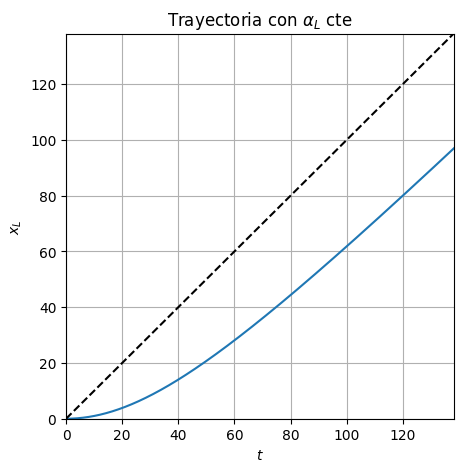

In [5]:
#Cuadriaceleración propia constante
alphaL=0.02

#Tiempos propios
taus=np.linspace(0,100,1000)

#Solución
ts=(1/alphaL)*np.sinh(alphaL*taus)
xLs=(1/alphaL)*(np.cosh(alphaL*taus)-1)
vLs=np.tanh(alphaL*taus)

#Gráfico
fig=plt.figure(figsize=(5,5))
ax=fig.gca()
ax.plot(ts,xLs)

#Decoración
rang=xLs.max()
ax.set_xlim(0,rang)
ax.set_ylim(0,rang)
ax.plot([0,rang],[0,rang],'k--')
ax.set_xlabel("$t$")
ax.set_ylabel("$x_L$")
ax.set_title("Trayectoria con $\\alpha_L$ cte")
ax.grid();

Ahora, la idea es ver como graficar las componentes de la cuadrivelocidad y cuadriaceleración, sobre los diferentes puntos de la línea de universo. 

En este caso, las ecuaciones clave son:

$$v_{Lx} = \tanh(\alpha_L \tau)$$
$$\frac{dt}{d\tau} = \cosh(\alpha_L \tau)$$
$$a_{xL} = \frac{d\tau}{dt}\frac{d v_{Lx}}{d\tau} = \frac{\alpha_L}{\cosh^3(\alpha_L \tau)}$$

$$U_L^0 = \gamma$$
$$U_L^x = \gamma v_{Lx} = \gamma \tanh(\alpha_L \tau)$$

$$A_L^0 = \gamma^4 \frac{\tanh(\alpha_L \tau) \alpha_L}{\cosh^3(\alpha_L \tau)}$$
$$A_L^x = \gamma^4 \frac{\alpha_L}{\cosh^3(\alpha_L \tau)}$$


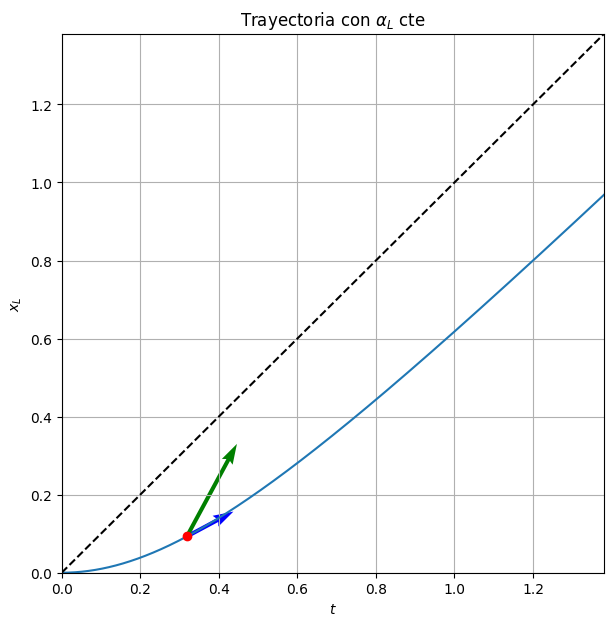

In [22]:
def vL_x(tau, alphaL):
    return np.tanh(alphaL*tau)

def gamma(tau, alphaL):
    return 1/ np.sqrt(1 - (vL_x(tau, alphaL)**2))

#componentes de la velocidad
#horizontal
def u_t(tau, alphaL):
    return gamma(tau, alphaL)

#vertical
def u_x(tau, alphaL):
    return gamma(tau, alphaL)*vL_x(tau, alphaL)

#componentes de la aceleracion
#horizontal
def acc_t(tau, alphaL):
    return gamma(tau, alphaL)**4 *alphaL * np.tanh(alphaL*tau) / np.cosh(alphaL*tau)**3

#vertical
def acc_x(tau, alphaL):
    return gamma(tau, alphaL)**4 *alphaL / np.cosh(alphaL*tau)**3


alphaL=2
max_tau = 1
taus=np.linspace(0,max_tau,1000)

ts=(1/alphaL)*np.sinh(alphaL*taus)
xLs=(1/alphaL)*(np.cosh(alphaL*taus)-1)
vLs=np.tanh(alphaL*taus)

fig=plt.figure(figsize=(7,7))
ax=fig.gca()
ax.plot(ts,xLs)

rang=xLs.max()
ax.set_xlim(0,rang)
ax.set_ylim(0,rang)
ax.plot([0,rang],[0,rang],'k--')
ax.set_xlabel("$t$")
ax.set_ylabel("$x_L$")
ax.set_title("Trayectoria con $\\alpha_L$ cte")
ax.grid()

#grafico las componentes de la velocidad, sobre el grafico anterior, en un tau determinado
pto = 300
tau = taus[pto]
#grafico el punto
ax.plot(ts[pto], xLs[pto], 'ro')
ax.quiver(ts[pto], xLs[pto], u_t(tau, alphaL), u_x(tau, alphaL), angles='xy', scale_units='xy', scale= 10,  color='b')

#graficar las componentes de la aceleracion
ax.quiver(ts[pto], xLs[pto], acc_t(tau, alphaL), acc_x(tau, alphaL), angles='xy', scale_units='xy', scale=10,  color='g')



# Interactivo

Agrupamos todo lo realizado previamente para desarrollar el interactivo.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def u_t(tau, alphaL):
    return np.cosh(alphaL * tau)

def u_x(tau, alphaL):
    return np.sinh(alphaL * tau)

def acc_t(tau, alphaL):
    return alphaL * np.sinh(alphaL * tau)

def acc_x(tau, alphaL):
    return alphaL * np.cosh(alphaL * tau)

def grafico_trayectoria(alphaL, max_tau, tau_actual):
    taus = np.linspace(0, max_tau, 100)
    ts = (1/alphaL) * np.sinh(alphaL * taus)
    xLs = (1/alphaL) * (np.cosh(alphaL * taus) - 1)

    tau = tau_actual
    t = (1/alphaL) * np.sinh(alphaL * tau)
    xL = (1/alphaL) * (np.cosh(alphaL * tau) - 1)

    fig = plt.figure(figsize=(4, 4))
    ax = fig.gca()
    ax.plot(ts, xLs)
    ax.set_xlim(0, xLs.max())
    ax.set_ylim(0, xLs.max())
    ax.plot([0, xLs.max()], [0, xLs.max()], 'k--')
    ax.set_xlabel("$t$")
    ax.set_ylabel("$x_L$")
    ax.set_title("Trayectoria con $\\alpha_L$ constante")

    ax.plot(t, xL, 'ro')
    ax.quiver(t, xL, u_t(tau, alphaL), u_x(tau, alphaL), angles='xy', scale_units='xy', scale=10, color='b')
    ax.quiver(t, xL, acc_t(tau, alphaL), acc_x(tau, alphaL), angles='xy', scale_units='xy', scale=10, color='g')
    plt.show()

interact(grafico_trayectoria, alphaL=(0.5, 3, 0.01), max_tau=(0.7, 1.4, 0.1), tau_actual=(0, max_tau, 0.1));


interactive(children=(FloatSlider(value=1.75, description='alphaL', max=3.0, min=0.5, step=0.01), FloatSlider(…